## Introduction to Neural Network classification with Tensorflow. 
The three major types of classification include:
* Binary Classification
* Multiclass classification
* Multilabel classifcation

 ### Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

#make 1000 example
n_samples = 1000

#create circles
X, y = make_circles(n_samples,
                   noise=0.03,
                    random_state=42)


In [2]:
#check features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
#check the first 10 labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

### Visualize our dataset
The data is hard to understand hence visualizing it will help us have a clear understanding of the dataset

In [4]:
import pandas as pd 
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


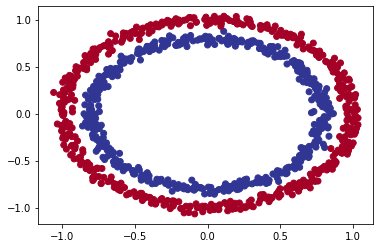

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [6]:
#importing the tensorflow lib
import tensorflow as tf

In [7]:
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
     tf.keras.layers.Dense(8, activation="relu", name="hidden_layer_1"),
      tf.keras.layers.Dense(16,activation="relu", name="hidden_layer_2"),
     tf.keras.layers.Dense(32,activation="relu", name="hidden_layer_3"),
    tf.keras.layers.Dense(1, activation="sigmoid",name="classification_layer")
])

model.compile(
optimizer=tf.keras.optimizers.Adam(),
loss=tf.keras.losses.BinaryCrossentropy(), #Because its a binary classification
metrics=["accuracy"]  
    
)

loss_history = model.fit(X,y, epochs=80)

Epoch 1/80
32/32 [==============================] - 1s 2ms/step - loss: 0.6953 - accuracy: 0.5047
Epoch 2/80
32/32 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.4857
Epoch 3/80
32/32 [==============================] - 0s 1ms/step - loss: 0.6887 - accuracy: 0.5004
Epoch 4/80
32/32 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5057
Epoch 5/80
32/32 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.5241
Epoch 6/80
32/32 [==============================] - 0s 1ms/step - loss: 0.6715 - accuracy: 0.5669
Epoch 7/80
32/32 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.6302
Epoch 8/80
32/32 [==============================] - 0s 2ms/step - loss: 0.6643 - accuracy: 0.6195
Epoch 9/80
32/32 [==============================] - 0s 2ms/step - loss: 0.6536 - accuracy: 0.6278
Epoch 10/80
32/32 [==============================] - 0s 2ms/step - loss: 0.6362 - accuracy: 0.6471
Epoch 11/80
32/32 [

In [8]:
#Evaluate your model
model.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 1.0000


[0.002796996384859085, 1.0]

In [9]:
#Check some of the model prediction. the fist 10 predictions
model.predict(X[:10,:])

array([[9.9988675e-01],
       [9.9988496e-01],
       [9.9530470e-01],
       [9.9805295e-01],
       [6.1696987e-06],
       [9.7493482e-01],
       [9.9937576e-01],
       [9.9994600e-01],
       [9.9982327e-01],
       [1.4955672e-05]], dtype=float32)

Text(0.5, 1.0, 'classification neural net loss curve')

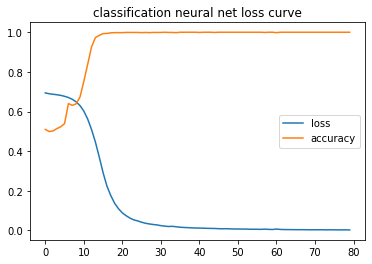

In [10]:
#plot the loss curves of the model
pd.DataFrame(loss_history.history).plot()
plt.title("classification neural net loss curve")

### Plotting our predictions

In [11]:
import numpy as np

import matplotlib.pyplot as plt

#creating a decision boundary
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)

    return fig, ax

    
    

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

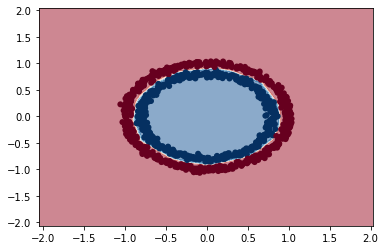

In [12]:
#plot the decision boundary
plot_decision_boundary(X, y, model, cmap='RdBu')

### Activation functions Visualization

#### we will start with..... No.1 Linear activation function
The Linear activation function does not change our input dataset, it returns the same values i.e 
it does not introduce non linearity in our data.

In [13]:
A = tf.cast(tf.range(-10,10), dtype=tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

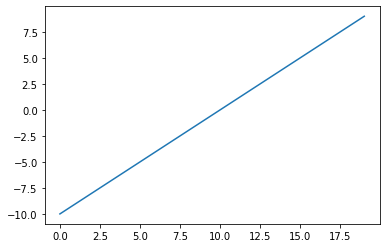

In [14]:
#plot the dataset
linear_data = tf.keras.activations.linear(A)
plt.plot(linear_data)

#### No.2 is Sigmoid activation function

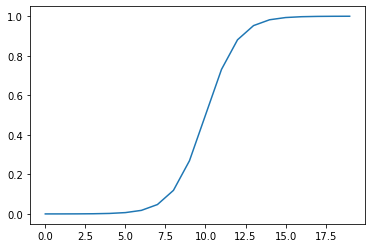

In [15]:
sigmoid_data = tf.keras.activations.sigmoid(A)
plt.plot(sigmoid_data)

#### No.3 is the relu activation function

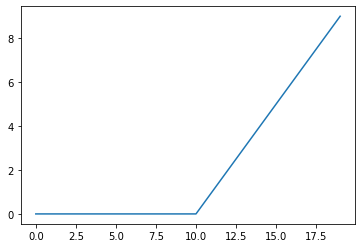

In [16]:
relu_data = tf.keras.activations.relu(A)
plt.plot(relu_data)

#### No.4 Tanh activation function

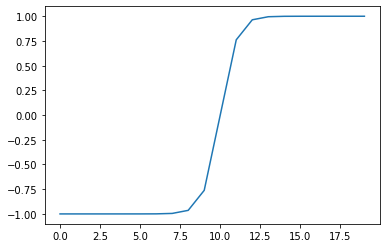

In [17]:
Tanh_data = tf.keras.activations.tanh(A)
plt.plot(Tanh_data)

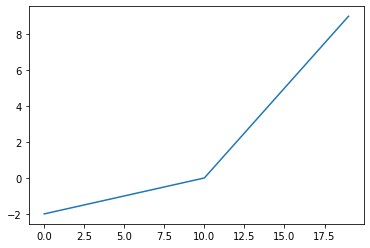

In [18]:
leaky_relu=tf.nn.leaky_relu(A)
plt.plot(leaky_relu)

### Check the accuracy of our models


In [19]:
loss, accuracy = model.evaluate(X,y)
print(f"The model loss is = {loss}")
print(f"The model accuracy is = {(accuracy*100)}")

32/32 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 1.0000
The model loss is = 0.002796996384859085
The model accuracy is = 100.0


In [20]:
#get the model predictions
y_pred = model.predict(X)

#Convert the generated predictions to either 0 or 1. for the confusion matriz to work all the datasets must be in same format
#e.g all must be in binary form, hence the reason for the conversion 
y_pred_rounded=tf.round(y_pred)
y_pred_rounded[:10], y[:10]

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.]], dtype=float32)>,
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [21]:
from sklearn.metrics import confusion_matrix
#Using the confusion matriz as our metrics
#the y_true contains the labels for the testing dataset
cm = confusion_matrix(y_true=y, y_pred=y_pred_rounded)
cm

array([[500,   0],
       [  0, 500]])

In [22]:
import itertools #this tool must be imported for the confusion matrix method below to work

#Define the pretty confusion matrix method here
def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[500   0]
 [  0 500]]


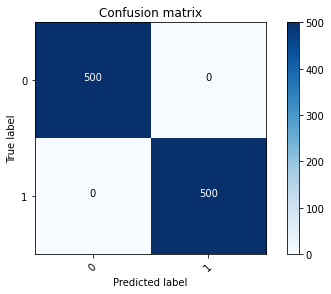

In [23]:
labels=["0","1"]
plot_confusion_matrix(cm=cm,classes=labels)

## Multi-class classification using neural net

In [24]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#data already split to test and training sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()


In [25]:
#check the shape of our datasets both for features and their lables
train_data.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [26]:
#Check a single train data and later plot it to visualize
train_data[0].shape

(28, 28)

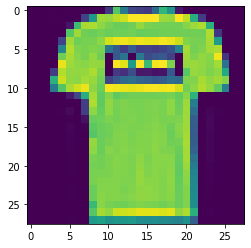

In [27]:
#plot to visualize
import matplotlib.pyplot as plt
plt.imshow(train_data[1])

In [28]:
#creating a small list to index to our training label
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", 
            "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_name)

10

Text(0.5, 1.0, 'Coat')

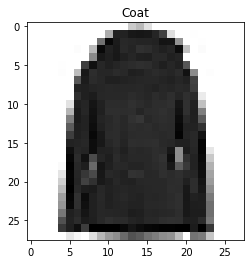

In [29]:
#plot the image together with its label
index_of_choice = 2000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_name[train_labels[index_of_choice]])

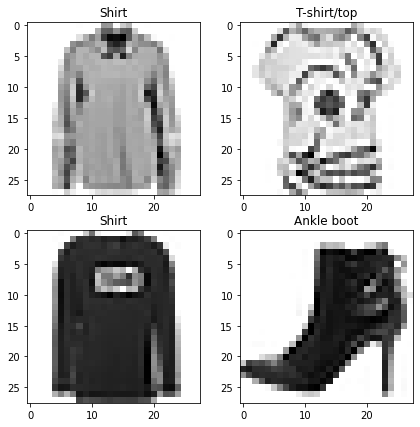

In [30]:
#Plotting multiple random images from the MNIST fashion dataset
import random

plt.figure(figsize=(7,7))

#loop for showing 4 images at the sametime
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    #select random indicies from the mnist dataset [0-59999] indicies can be selected
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_name[train_labels[rand_index]])

## Building a multi-classification models
When we use **categorical_crossentropy** as our loss function our labels must be one-hot encoded. But when have our labels in integer form we use **SparseCategoricalCrossentropy** as our loss function.

In [31]:
train_data_norm = (train_data/255)
train_data_norm.min()

0.0

In [39]:
#Create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), #flattens our input data to a 1D vector of 784 elemets
      tf.keras.layers.Dense(16, activation="relu", name="hidden_layer_1"),
     tf.keras.layers.Dense(32, activation="relu", name="hidden_layer_2"),
      tf.keras.layers.Dense(64, activation="relu", name="hidden_layer_3"),
     tf.keras.layers.Dense(128, activation="relu", name="hidden_layer_8"),
      tf.keras.layers.Dense(64, activation="relu", name="hidden_layer_7"),
     tf.keras.layers.Dense(32, activation="relu", name="hidden_layer_4"),
     tf.keras.layers.Dense(16, activation="relu", name="hidden_layer_5"),
       tf.keras.layers.Dense(8, activation="relu", name="hidden_layer_9"),
    tf.keras.layers.Dense(10, activation="softmax", name="classification_layer")
], name="multi_class_classification_model")

#compile the model
model.compile(
optimizer = tf.keras.optimizers.Adam(),
loss = "sparse_categorical_crossentropy",
metrics = ["accuracy"]
)

non_norm_history = model.fit(train_data_norm,train_labels, epochs=40, validation_split=0.1) #validation_data= can be used if we have valid_data


Epoch 1/40
1688/1688 [==============================] - 4s 2ms/step - loss: 1.1052 - accuracy: 0.5921 - val_loss: 0.5275 - val_accuracy: 0.8100
Epoch 2/40
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4954 - accuracy: 0.8230 - val_loss: 0.4542 - val_accuracy: 0.8453
Epoch 3/40
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4170 - accuracy: 0.8532 - val_loss: 0.4133 - val_accuracy: 0.8560
Epoch 4/40
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3906 - accuracy: 0.8607 - val_loss: 0.3920 - val_accuracy: 0.8572
Epoch 5/40
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3755 - accuracy: 0.8640 - val_loss: 0.3813 - val_accuracy: 0.8605
Epoch 6/40
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3631 - accuracy: 0.8698 - val_loss: 0.3924 - val_accuracy: 0.8577
Epoch 7/40
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3461 - accuracy: 0.8725 - val_loss: 0.4023 - val_accuracy:

In [41]:
model.evaluate((test_data/255),test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4102 - accuracy: 0.8699


[0.41019243001937866, 0.8698999881744385]

### fitting our model using categorical_crossentropy.
In this case the labels must be one-hot encoded. Since the labels are alread in array
form we can use tf.one_hot to convert then in one_hot encoded format.

In [49]:
train_labels_one_hot_encoded = tf.one_hot(train_labels, depth=10)
train_labels_one_hot_encoded

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [52]:
#Train model using categorical_cross_entropy as the loss function
#Create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), #flattens our input data to a 1D vector of 784 elemets
      tf.keras.layers.Dense(16, activation="relu", name="hidden_layer_1"),
     tf.keras.layers.Dense(32, activation="relu", name="hidden_layer_2"),
      tf.keras.layers.Dense(64, activation="relu", name="hidden_layer_3"),
     tf.keras.layers.Dense(128, activation="relu", name="hidden_layer_8"),
      tf.keras.layers.Dense(64, activation="relu", name="hidden_layer_7"),
     tf.keras.layers.Dense(32, activation="relu", name="hidden_layer_4"),
     tf.keras.layers.Dense(16, activation="relu", name="hidden_layer_5"),
       tf.keras.layers.Dense(8, activation="relu", name="hidden_layer_9"),
    tf.keras.layers.Dense(10, activation="softmax", name="classification_layer")
], name="multi_class_classification_model")

#compile the model
model.compile(
optimizer = tf.keras.optimizers.Adam(),
loss = "categorical_crossentropy",
metrics = ["accuracy"]
)

non_norm_history = model.fit(train_data_norm,train_labels_one_hot_encoded, epochs=40, 
                             validation_split=0.1, verbose=0) #validation_data= can be used if we have valid_data



In [55]:
#model evaluation - The data format u use to train your model, must be the same form you use to evaluate uour model
model.evaluate((test_data/255),tf.one_hot(test_labels, depth=10))

313/313 [==============================] - 1s 2ms/step - loss: 0.4184 - accuracy: 0.8665


[0.41840454936027527, 0.8665000200271606]

In [63]:
 y_pred=model.predict((test_data/255))
    
 y_pred[0], train_labels[0]

(array([2.9457143e-09, 3.5697738e-15, 2.9944536e-10, 1.3800848e-11,
        1.8189047e-13, 1.5654216e-03, 6.5415076e-11, 1.9337732e-03,
        9.2413472e-07, 9.9649978e-01], dtype=float32),
 9)

### Plotting the loss curve for our trained model

<AxesSubplot:title={'center':'Normalized Data loss curve'}>

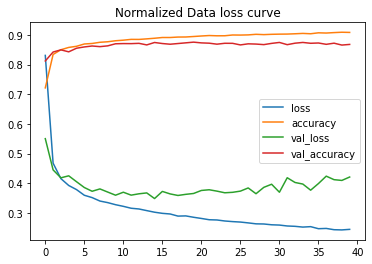

In [64]:
pd.DataFrame(non_norm_history.history).plot(title="Normalized Data loss curve")

### Making predictions using our model Evalutiong it using confusion matrix

In [65]:
#making predictions on our model
y_pred=model.predict((test_data/255))
    
y_pred[0]

array([2.9457143e-09, 3.5697738e-15, 2.9944536e-10, 1.3800848e-11,
       1.8189047e-13, 1.5654216e-03, 6.5415076e-11, 1.9337732e-03,
       9.2413472e-07, 9.9649978e-01], dtype=float32)

In [72]:
#Return index of the highest probability value
y_pred_index=tf.argmax(y_pred, axis=1)
y_pred_index

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([9, 2, 1, ..., 8, 1, 5])>

In [76]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=test_labels, y_pred=y_pred_index)
cm

array([[804,  13,   6,  32,   5,   1, 124,   0,  15,   0],
       [  3, 971,   2,  16,   5,   0,   2,   0,   1,   0],
       [ 10,   2, 792,  17,  92,   0,  82,   0,   5,   0],
       [ 44,  32,   7, 840,  37,   1,  36,   0,   3,   0],
       [  0,   0, 122,  28, 805,   0,  43,   0,   2,   0],
       [  0,   1,   0,   2,   0, 952,   0,  30,   4,  11],
       [110,  10,  80,  25,  97,   0, 660,   0,  18,   0],
       [  0,   0,   0,   0,   0,  22,   0, 957,   2,  19],
       [  1,   2,   3,   6,   7,   2,  12,   7, 960,   0],
       [  0,   0,   0,   2,   0,  23,   0,  49,   2, 924]])

In [82]:
#make our conusion matrix pretty
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(cm=cm, classes=None, figsize=(10, 10), text_size=15):

  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes 
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels, 
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)


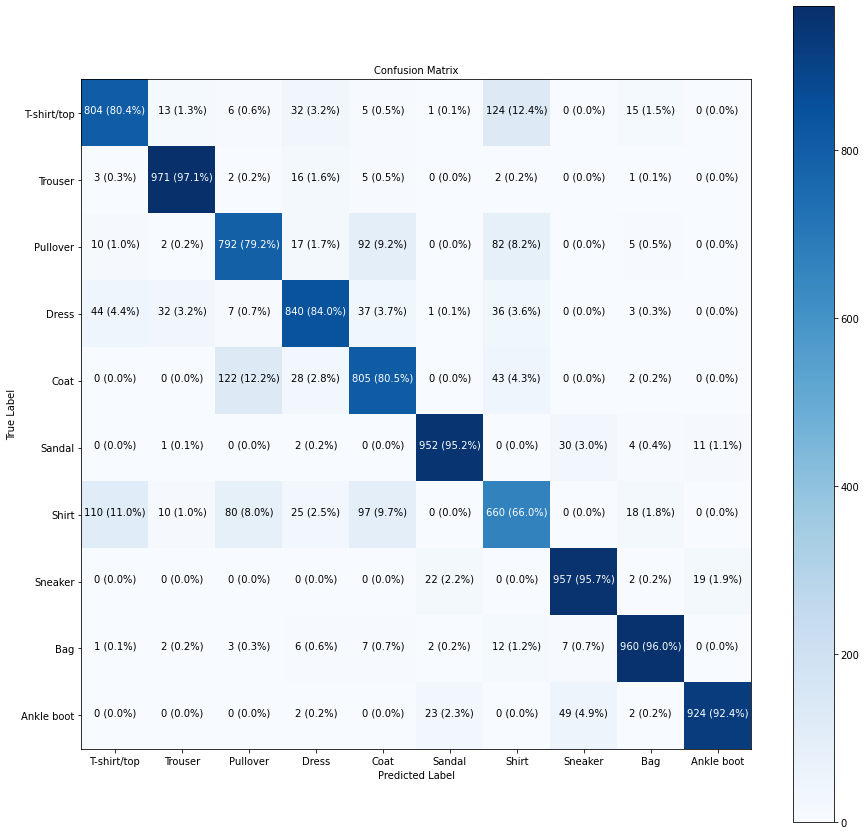

In [89]:
make_confusion_matrix(cm, classes=class_name, figsize=(15, 15), text_size=10)

### Function for randomly selecting our images and and visualize whether its true or false

In [95]:
import random

def plot_random_image(model, images, true_labels, classes):
    """
    Picks random image, plots the image and labels it with a predicted and truth label
    """
    
    #set up random image 0-10000
    i = random.randint(0, len(images))
    
    #create predictions adn targets
    target_image = images[i]
    prediction_probabilities = model.predict(target_image.reshape(1,28,28))
    pred_label = classes[prediction_probabilities.argmax()] #returns index of the highest prob value
    true_label = classes[true_labels[i]]
    
    #plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)
    
    #change the color of the titles depending on whether the prediction is right or wrong
    if pred_label == true_label:
        color="green"
    else:
        color="red"
        
    #Add xlabel information
    plt.xlabel(f"Prediction: {pred_label} {100*tf.reduce_max(prediction_probabilities):2.0f}% (True: {true_label})",
              color=color)

     

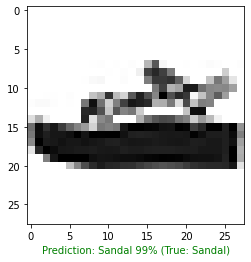

In [106]:
#checkout random image as well as its prediction
plot_random_image(
model=model,
images=(test_data/255),
true_labels=test_labels,
classes=class_name
)

### Model Patterns

In [109]:
#Extract the layers list
model.layers

In [116]:
#Extract a single layer
model_layer=model.layers[1]
model_layer

In [120]:
#Get patterns of layer in the network
weights, biases = model_layer.get_weights()

weights, weights.shape

(array([[ 0.7544617 , -0.3963304 ,  0.84375167, ...,  0.9243774 ,
          1.0389347 , -0.89180094],
        [ 0.8750004 , -1.0287211 ,  0.89675385, ...,  0.6309698 ,
          0.0726758 , -0.4829426 ],
        [ 0.43901563, -1.3376579 ,  0.603673  , ...,  1.4144448 ,
         -0.87119365, -1.5141648 ],
        ...,
        [ 0.24442849,  0.22040367,  0.29432908, ...,  0.6737284 ,
         -0.441605  ,  0.47942013],
        [ 0.6881746 , -0.00658087,  0.47451976, ...,  0.26596177,
         -0.16585769,  0.5136291 ],
        [ 0.45950022, -0.6667232 ,  0.73578185, ...,  0.6943176 ,
         -0.547167  , -0.5934591 ]], dtype=float32),
 (784, 16))

In [121]:
#Lets check out the bias vector
biases, biases.shape

(array([ 0.3181014 ,  0.22542319,  0.04652531,  0.54164547, -0.02564228,
         0.16356045,  0.74165004, -0.47125578, -0.0401402 ,  0.06337468,
         0.2330244 ,  0.38724533,  0.25152275,  0.06307128,  0.23711842,
         0.15969133], dtype=float32),
 (16,))

### The bias vector dictates how much the patterns within the corresponding weight matrix should influence the next layer.

In [124]:
## model summary
model.summary()

Model: "multi_class_classification_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 16)                12560     
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 32)                544       
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 64)                2112      
_________________________________________________________________
hidden_layer_8 (Dense)       (None, 128)               8320      
_________________________________________________________________
hidden_layer_7 (Dense)       (None, 64)                8256      
_________________________________________________________________
hidden_layer_4 (Dense)       (None

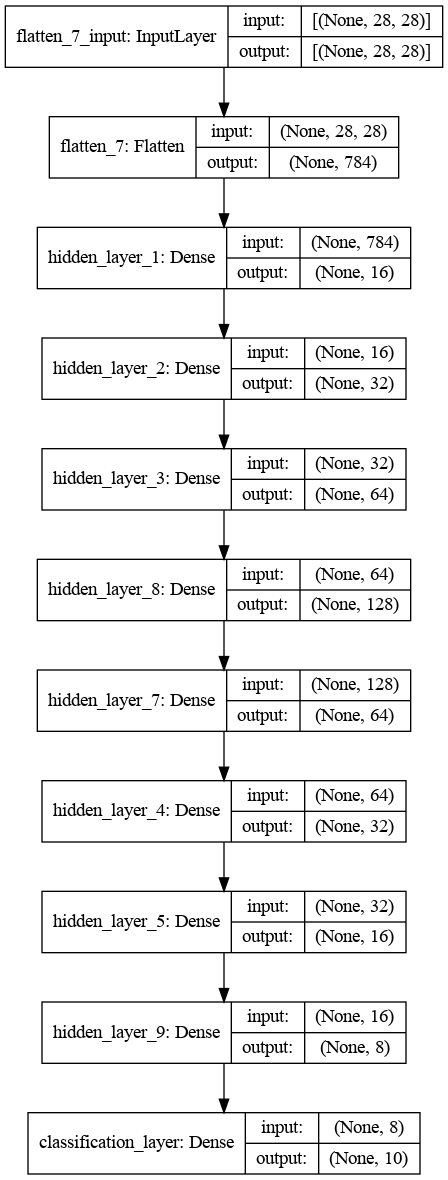

In [126]:
##visualize the model in an image
from tensorflow.keras.utils import plot_model

#see input an output of each layer in the model
plot_model(model, show_shapes=True)

In [ ]:
model.save()